In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import plotly.graph_objects as go

In [2]:
# Step 1: Create sample dataset
np.random.seed(42)
X1 = np.random.uniform(0, 10, 100)
X2 = np.random.uniform(0, 10, 100)
y = 3 * X1 + 2 * X2 + np.random.normal(0, 2, 100)
data = pd.DataFrame({'X1': X1, 'X2': X2, 'Y': y})
data.head()

,X1,X2,Y
0,3.745401,0.314292,10.504738
1,9.507143,6.364104,41.714145
2,7.319939,3.143560,28.833083
3,5.986585,5.085707,26.702466
4,1.560186,9.075665,26.563438


In [3]:
# Step 2: Prepare features and target
X = data[['X1', 'X2']]
y = data['Y']

In [4]:
# Step 3: Fit linear regression
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Error metrics
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R^2 Score: {r2:.2f}")

Coefficients: [2.93165494 2.14386228]
Intercept: -0.17877992709985335
Mean Squared Error: 3.78
Mean Absolute Error: 1.55
R^2 Score: 0.97


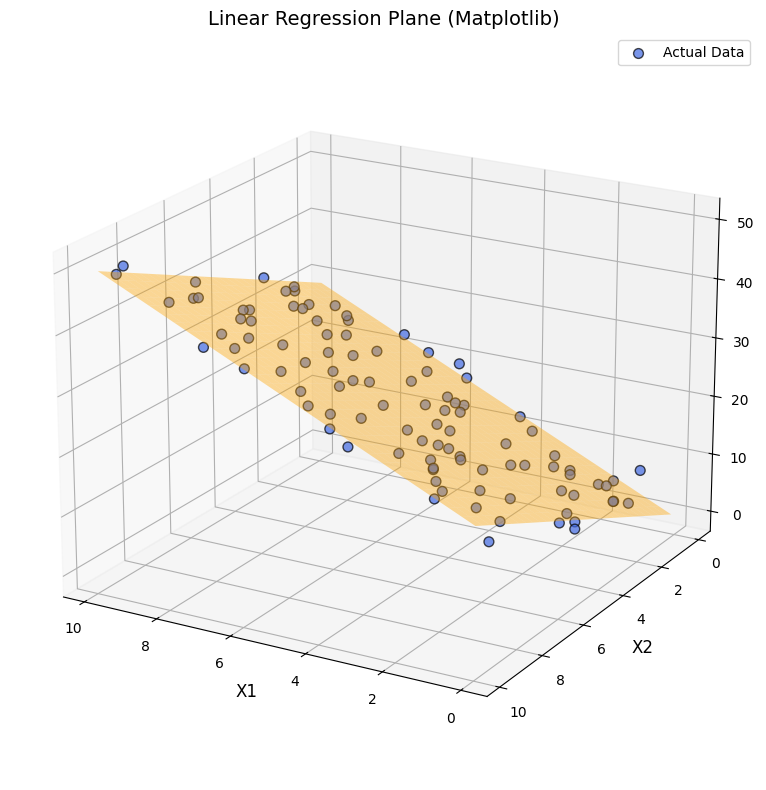

In [5]:
# Step 4: Plot with Matplotlib
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['X1'], data['X2'], data['Y'], color='royalblue', s=50, label='Actual Data', alpha=0.7, edgecolor='k')
x1_grid, x2_grid = np.meshgrid(np.linspace(data['X1'].min(), data['X1'].max(), 30),
                               np.linspace(data['X2'].min(), data['X2'].max(), 30))
y_pred_grid = model.intercept_ + model.coef_[0] * x1_grid + model.coef_[1] * x2_grid
ax.plot_surface(x1_grid, x2_grid, y_pred_grid, alpha=0.4, color='orange')
ax.set_xlabel('X1', fontsize=12)
ax.set_ylabel('X2', fontsize=12)
ax.set_zlabel('Y', fontsize=12)
ax.set_title('Linear Regression Plane (Matplotlib)', fontsize=14)
ax.view_init(elev=20, azim=120)
ax.legend()
plt.tight_layout()
plt.show()

In [6]:
# Step 5: Plot with Plotly
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=data['X1'], y=data['X2'], z=data['Y'],
                           mode='markers',
                           marker=dict(size=5, color='blue', opacity=0.8),
                           name='Actual Data'))
fig.add_trace(go.Surface(x=x1_grid, y=x2_grid, z=y_pred_grid,
                         colorscale=[[0, 'orange'], [1, 'orange']],
                         opacity=0.5, showscale=False, name='Regression Plane'))
fig.update_layout(scene=dict(
                    xaxis_title='X1',
                    yaxis_title='X2',
                    zaxis_title='Y',
                    camera=dict(eye=dict(x=1.4, y=1.4, z=0.8))
                ),
                title='Linear Regression Plane (Plotly)',
                margin=dict(l=0, r=0, b=0, t=40))
fig.show()